<a href="https://colab.research.google.com/github/Sagar387/Conjoint_Analysis/blob/main/Conjoint_Analysis_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Conjoint Analysis

/content/drive/MyDrive/Conjoint Analysis


In [ ]:
!pip install statsmodels

In [ ]:
!pip install squarify

In [ ]:
# Import libraies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [ ]:
# Load the netflix csv data file
df = pd.read_csv("/content/drive/MyDrive/Conjoint Analysis/netflix_customer_survey.csv")
df.head(10)

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1
5,7,2,15,Marvel,none,0
6,7,1,12,Disney,one_per_show,0
7,7,4,18,less content,none,1
8,7,4,15,Prime originals,one_per_show,0
9,7,3,18,Soccer,one_per_show,0


# Data Processing

In [ ]:
# Seperate the X and y variables
X = df.drop(['selected','customerid'], axis=1)
y = df['selected']

X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [ ]:
# Create dummy varibales (one hot encoding)
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head(2)

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True


## Methodody of the coinjoint analysis

We select one column as the dependent variable and treat the remaining columns as independent variables. To analyze their impact, we apply logistic regression, which models the probability of the outcome based on the given features.

The model outputs coefficients for each variable:
- Higher coefficients → stronger influence on the outcome
- Lower/negative coefficients → weaker or negative influence

By comparing coefficients, we identify the most important features, providing insight into the preference structure in the conjoint analysis.


# Regression Model

In [ ]:
# Build the Regression model, y is dependant, X_dummy is the indepedant variables
model = sm.GLM(y, # GLM is generalized logisitc regression
               X_dummy,
               family=sm.families.Binomial()).fit() # Family tells the outcome to be binary which is logistic regression

# Show the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Thu, 28 Aug 2025   Deviance:                       3896.6
Time:                        18:04:51   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7042      0.090     -7.793      0.000      -0.881      -0.527
NumberAccounts_2                -0.0733      0.088     -0.830      0.407      -0.246       0.100
NumberAccounts_3                -0.0216      0.088     -0.247      0.805      -0.194       0.150
NumberAccounts_4                 0.1253      0.083      1.503      0.133      -0.038       0.289
NumberAccounts_5                 0.1312      0.085      1.547      0.122      -0.035       0.297
NumberAccounts_6                 0.4971      0.082      6.032      0.000       0.336       0.659
price_8                          0.2966      0.085      3.475      0.001       0.129       0.464
price_10                         0.2205      0.087      2.531      0.011       0.050       0.391
price_12                         0.2017      0.083      2.445      0.015       0.040       0.364
price_15                         0.0197      0.084      0.234      0.815      -0.145       0.185
price_18                        -0.1028      0.087     -1.180      0.238      -0.273       0.068
price_20                        -0.6813      0.090     -7.570      0.000      -0.858      -0.505
ExtraContent_Disney              0.2280      0.088      2.600      0.009       0.056       0.400
ExtraContent_HBO                 0.2267      0.085      2.662      0.008       0.060       0.394
ExtraContent_Marvel              0.1450      0.084      1.723      0.085      -0.020       0.310
ExtraContent_Prime originals     0.1277      0.087      1.474      0.140      -0.042       0.297
ExtraContent_Soccer             -0.2046      0.085     -2.404      0.016      -0.371      -0.038
ExtraContent_less content       -0.5682      0.087     -6.506      0.000      -0.739      -0.397
ads_none                         0.2079      0.055      3.745      0.000       0.099       0.317
ads_one_per_day                  0.1090      0.056      1.931      0.053      -0.002       0.220
ads_one_per_show                -0.3623      0.057     -6.357      0.000      -0.474      -0.251
================================================================================================
"""

# Coinjoint Analysis

In [ ]:
# Want to see the most important features by seeing the coefficients

#Create a DF with the results
df_results = pd.DataFrame({'param_name' : model.params.keys(),
                           'partworth': model.params.values,
                           'pval': model.pvalues})
df_results

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.704198,6.544261e-15
NumberAccounts_2,NumberAccounts_2,-0.073251,4.065002e-01
NumberAccounts_3,NumberAccounts_3,-0.021623,8.052935e-01
NumberAccounts_4,NumberAccounts_4,0.125293,1.328110e-01
NumberAccounts_5,NumberAccounts_5,0.131202,1.217556e-01
NumberAccounts_6,NumberAccounts_6,0.497114,1.617766e-09
price_8,price_8,0.296594,5.113955e-04
price_10,price_10,0.220500,1.138256e-02
price_12,price_12,0.201748,1.450426e-02
price_15,price_15,0.019741,8.146568e-01


In [ ]:
# Identifying the statistically significant variables
df_results['signficant'] = df_results['pval'] < 0.05
df_results['color'] = ['blue' if x else 'red' for x in df_results['signficant']]
df_results.head()

,param_name,partworth,pval,signficant,color
NumberAccounts_1,NumberAccounts_1,-0.704198,6.544261e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073251,4.065002e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021623,8.052935e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125293,1.328110e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131202,1.217556e-01,False,red


In [ ]:
# Sort values
df_results = df_results.sort_values(by = 'partworth', ascending = True)
df_results.head()

,param_name,partworth,pval,signficant,color
NumberAccounts_1,NumberAccounts_1,-0.704198,6.544261e-15,True,blue
price_20,price_20,-0.681282,3.730474e-14,True,blue
ExtraContent_less content,ExtraContent_less content,-0.568203,7.697109e-11,True,blue
ads_one_per_show,ads_one_per_show,-0.362278,2.052008e-10,True,blue
ExtraContent_Soccer,ExtraContent_Soccer,-0.204567,1.622982e-02,True,blue


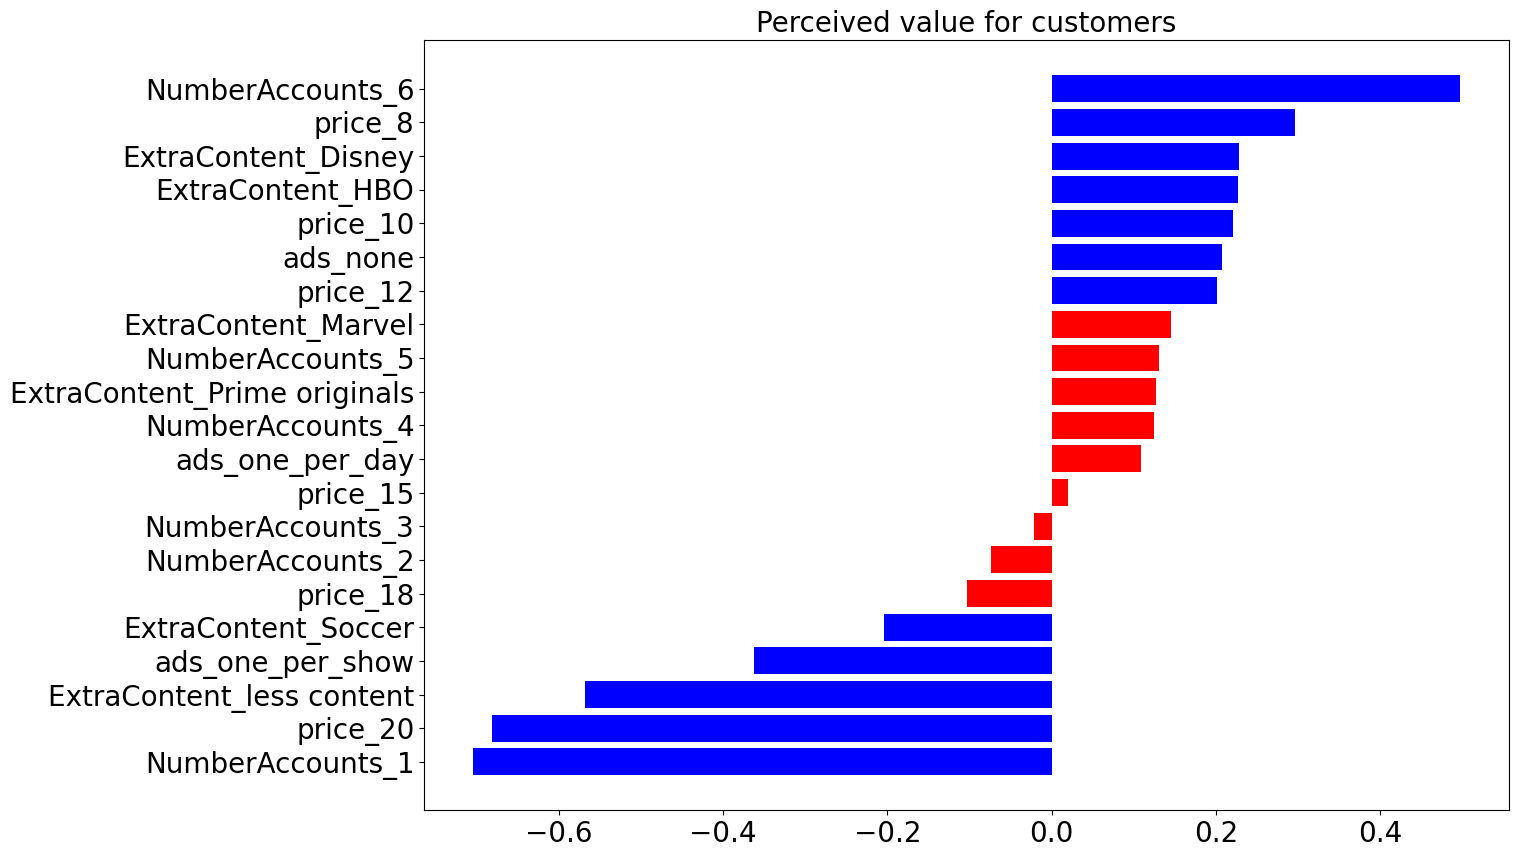

In [ ]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (14,10))
values = df_results.partworth # Part worths shows how much a feture contributes
xbar =  np.arange(len(values)) # Create positions for each bar on y-axis

# Add titles
plt.title("Perceived value for customers", fontsize = 20)
# Bar plot
plt.barh(xbar,
         values,
         color = df_results['color'])
#Customizing the ticks
plt.yticks(xbar,
           labels = df_results['param_name'],
           fontsize = 20)

plt.xticks(fontsize= 20)
plt.show()

We can see that the longer bars towards the left side decrease performance while the longer bars pointing towards the right side increase performace

# Specfic groups of Features

In [ ]:
from inspect import Attribute
# Isolate the feature group
feature = "NumberAccounts"
attributes = []
coefficients = []

for i in range (len(df_results)):
  if df_results.iloc[i,0].find(feature) == 0:
    attributes.append(df_results.iloc[i,0])
    coefficients.append(df_results.iloc[i,1])
print(attributes)
print(coefficients)

['NumberAccounts_1', 'NumberAccounts_2', 'NumberAccounts_3', 'NumberAccounts_4', 'NumberAccounts_5', 'NumberAccounts_6']
[np.float64(-0.7041975840438723), np.float64(-0.0732506364502458), np.float64(-0.0216227561162481), np.float64(0.1252929898582812), np.float64(0.13120150226758978), np.float64(0.4971139578067485)]


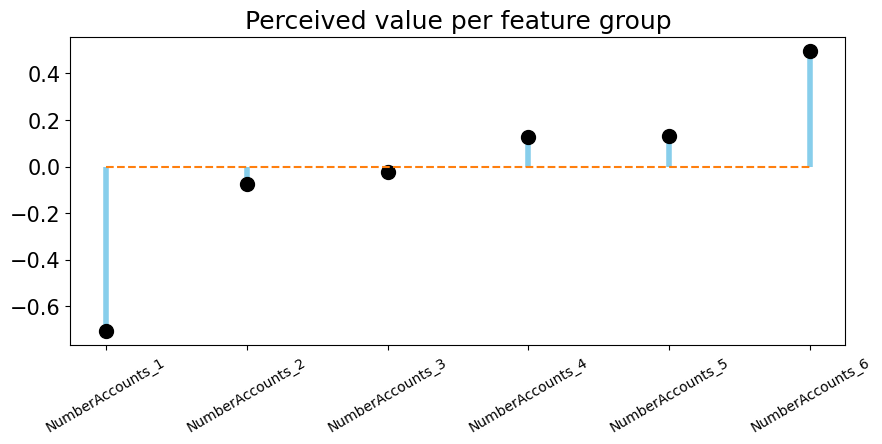

In [ ]:
# Lollipop Chart

f, ax = plt.subplots(figsize = (10,4))


# Add titles
plt.title("Perceived value per feature group", fontsize = 18)

# Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = "--")

# Customize the lollipop
plt.setp(stemlines,
          color = "skyblue",
          linewidth = 4)

plt.setp(markers,
          color = "black",
          markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 15)
plt.xticks(fontsize= 10,
           rotation = 30)

# Plot
plt.show()

# Feature Importance


In [ ]:
# Coefficents
features_partworth = {}

for key, coeff in model.params.items():
  split_key = key.split('_')
  feature = split_key[0]
  if feature not in features_partworth:
    features_partworth[feature] = list()
  features_partworth[feature].append(coeff)

features_partworth

{'NumberAccounts': [-0.7041975840438723,
  -0.0732506364502458,
  -0.0216227561162481,
  0.1252929898582812,
  0.13120150226758978,
  0.4971139578067485],
 'price': [0.2965938682611904,
  0.22050047964155434,
  0.2017482617997638,
  0.019740749777867377,
  -0.10276370473236704,
  -0.681282181425755],
 'ExtraContent': [0.22795094929983067,
  0.22666160162349866,
  0.14504280925136182,
  0.12765167127586477,
  -0.20456682658091807,
  -0.5682027315473843],
 'ads': [0.2078632099942415, 0.10895178230491948, -0.3622775189769076]}

In [ ]:
# Calculation: maximum of a feature (price_8) minus the mininum of a feature (price_20)
importance_per_feature = {k: max(v) - min(v) for k, v in features_partworth.items()}
importance_per_feature

{'NumberAccounts': 1.2013115418506208,
 'price': 0.9778760496869454,
 'ExtraContent': 0.7961536808472149,
 'ads': 0.5701407289711491}

In [ ]:
# Computing sum of importance
total_importance = sum(importance_per_feature.values())
total_importance

3.5454820013559303

In [ ]:
# Making sure everything adds up to a 100 - Relative importance
relative_importance_per_feature = {
    k: round(100* v/total_importance, 1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature


{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.5, 'ads': 16.1}

In [ ]:
# Build DF
df_importances = pd.DataFrame(list(relative_importance_per_feature.items()),
                              columns = ['feature', 'relative_importance'])
df_importances

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.5
3,ads,16.1


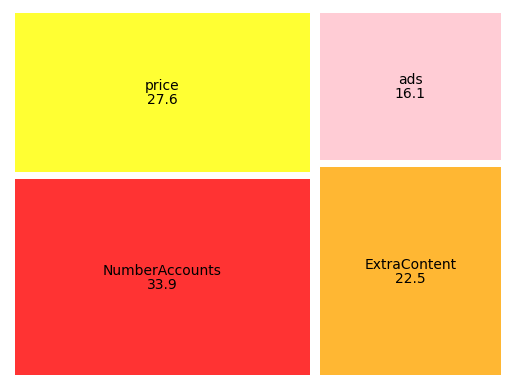

In [ ]:
# Treemap visualization
squarify.plot(sizes = df_importances.relative_importance,
              label = df_importances.feature,
              color = ["red", "yellow", "orange","pink"],
              value = df_importances.relative_importance,
              alpha = 0.8,
              pad = 1)
plt.axis ("off")
plt.show()

The ranking of the importances : Number of Accounts, Price, ExtraContent and then ads

# Interaction Terms

Trying to find whether a combinations of features are importance to the customer

In [ ]:
 # Create Interaction terms
 df['content_ads'] = df.ExtraContent + "_" + df.ads
 df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [ ]:
# Remove the individual columns
df_interaction = df.drop(['ExtraContent', 'ads'], axis =1)
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [ ]:
# Build a Model , select X and y
X = df_interaction.drop(['selected','customerid'], axis=1)
y = df_interaction['selected']

# Create dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Build Generalized regression model
model2 = sm.GLM(y, X_dummy,
                families = sm.families.Binomial()).fit()
model2.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2972
Model Family:                Gaussian   Df Model:                           27
Link Function:               Identity   Scale:                         0.23027
Method:                          IRLS   Log-Likelihood:                -2039.9
Date:                Thu, 28 Aug 2025   Deviance:                       684.31
Time:                        18:09:23   Pearson chi2:                     684.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09073
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                             0.0524      0.020      2.594      0.009       0.013       0.092
NumberAccounts_2                             0.1981      0.021      9.492      0.000       0.157       0.239
NumberAccounts_3                             0.2069      0.021     10.003      0.000       0.166       0.247
NumberAccounts_4                             0.2408      0.020     12.242      0.000       0.202       0.279
NumberAccounts_5                             0.2431      0.020     12.226      0.000       0.204       0.282
NumberAccounts_6                             0.3283      0.019     17.226      0.000       0.291       0.366
price_8                                      0.2826      0.020     14.175      0.000       0.244       0.322
price_10                                     0.2633      0.020     12.884      0.000       0.223       0.303
price_12                                     0.2610      0.019     13.529      0.000       0.223       0.299
price_15                                     0.2165      0.020     10.921      0.000       0.178       0.255
price_18                                     0.1882      0.020      9.183      0.000       0.148       0.228
price_20                                     0.0578      0.020      2.853      0.004       0.018       0.098
content_ads_Disney_none                      0.1495      0.035      4.215      0.000       0.080       0.219
content_ads_Disney_one_per_day               0.1973      0.039      5.013      0.000       0.120       0.274
content_ads_Disney_one_per_show              0.0345      0.037      0.937      0.349      -0.038       0.107
content_ads_HBO_none                         0.1939      0.036      5.390      0.000       0.123       0.264
content_ads_HBO_one_per_day                  0.1901      0.035      5.388      0.000       0.121       0.259
content_ads_HBO_one_per_show                -0.0124      0.036     -0.340      0.733      -0.084       0.059
content_ads_Marvel_none                      0.1314      0.035      3.716      0.000       0.062       0.201
content_ads_Marvel_one_per_day               0.1254      0.036      3.454      0.001       0.054       0.197
content_ads_Marvel_one_per_show              0.0582      0.035      1.658      0.097      -0.011       0.127
content_ads_Prime originals_none             0.1315      0.037      3.595      0.000       0.060       0.203
content_ads_Prime originals_one_per_day      0.1013      0.036      2.811      0.005       0.031       0.172
content_ads_Prime originals_one_per_show     0.0752      0.038      2.002      0.045       0.002       0.149
content_ads_Soccer_none                      0.1044      0.036      2.908      0.004       0.034       0.175
content_ads_Soccer_one_per_day 

# Interaction terms Visulations

In [ ]:
#Create a DF with the results
df_results_interaction = pd.DataFrame({'param_name' : model2.params.keys(),
                           'partworth': model2.params.values,
                           'pval': model2.pvalues}).sort_values( by = "partworth")
df_results_interaction

,param_name,partworth,pval
content_ads_less content_one_per_show,content_ads_less content_one_per_show,-0.167056,4.023615e-06
content_ads_Soccer_one_per_show,content_ads_Soccer_one_per_show,-0.045434,2.103419e-01
content_ads_less content_one_per_day,content_ads_less content_one_per_day,-0.028690,4.393014e-01
content_ads_HBO_one_per_show,content_ads_HBO_one_per_show,-0.012399,7.334865e-01
content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_day,0.012522,7.276412e-01
content_ads_less content_none,content_ads_less content_none,0.017973,6.066206e-01
content_ads_Disney_one_per_show,content_ads_Disney_one_per_show,0.034489,3.486553e-01
NumberAccounts_1,NumberAccounts_1,0.052441,9.483379e-03
price_20,price_20,0.057839,4.329551e-03
content_ads_Marvel_one_per_show,content_ads_Marvel_one_per_show,0.058180,9.732713e-02


In [ ]:
from inspect import Attribute
# Isolate the feature group
feature = "content_ads"
attributes = []
coefficients = []

for i in range (len(df_results_interaction)):
  if df_results_interaction.iloc[i,0].find(feature) == 0:
    if df_results_interaction.iloc[i,0].find("none") == -1:
      attributes.append(df_results_interaction.iloc[i,0])
      coefficients.append(df_results_interaction.iloc[i,1])
print(attributes)
print(coefficients)

['content_ads_less content_one_per_show', 'content_ads_Soccer_one_per_show', 'content_ads_less content_one_per_day', 'content_ads_HBO_one_per_show', 'content_ads_Soccer_one_per_day', 'content_ads_Disney_one_per_show', 'content_ads_Marvel_one_per_show', 'content_ads_Prime originals_one_per_show', 'content_ads_Prime originals_one_per_day', 'content_ads_Marvel_one_per_day', 'content_ads_HBO_one_per_day', 'content_ads_Disney_one_per_day']
[np.float64(-0.16705593364849092), np.float64(-0.045433589288104384), np.float64(-0.028689956935834558), np.float64(-0.012399411596155686), np.float64(0.012521993950792619), np.float64(0.034488715437335934), np.float64(0.05817954036057332), np.float64(0.07521924748886835), np.float64(0.10126269299608782), np.float64(0.12539669521617558), np.float64(0.1900813489569563), np.float64(0.19733843888077293)]


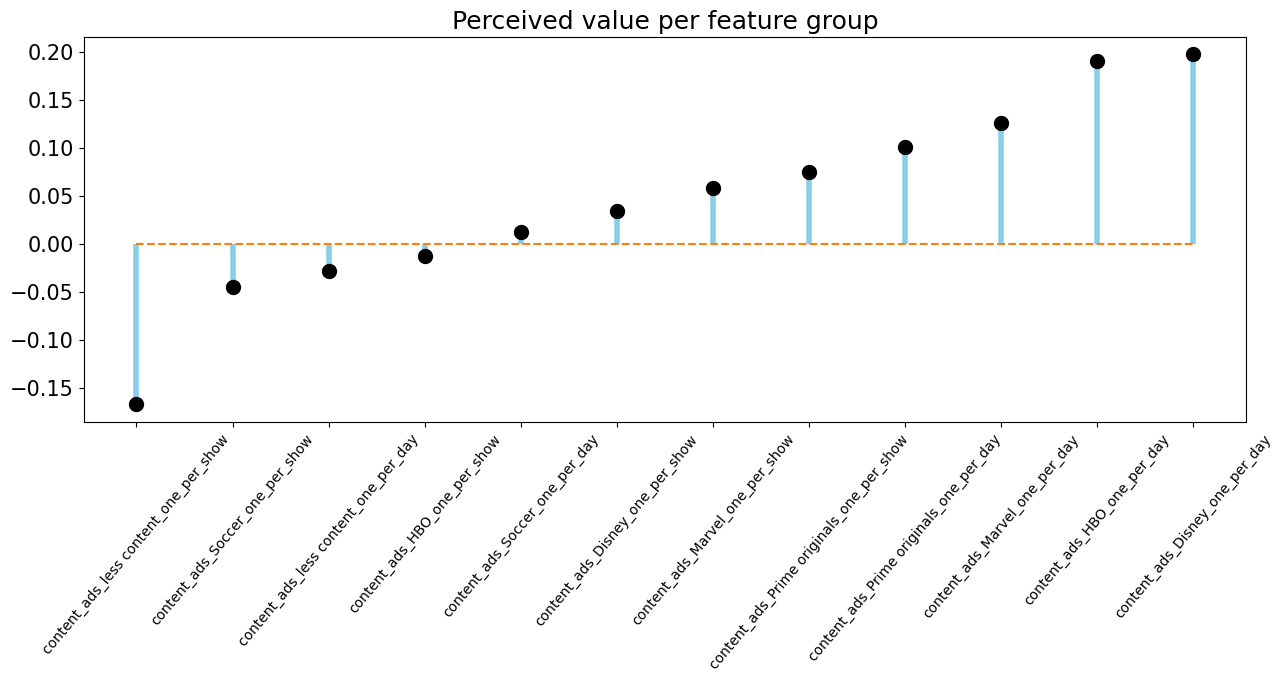

In [ ]:

# Lollipop Chart

f, ax = plt.subplots(figsize = (15,5))


# Add titles
plt.title("Perceived value per feature group", fontsize = 18)

# Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = "--")

# Customize the lollipop
plt.setp(stemlines,
          color = "skyblue",
          linewidth = 4)

plt.setp(markers,
          color = "black",
          markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 15)
plt.xticks(fontsize= 10,
           rotation = 50)

# Plot
plt.show()

# Next Steps

Oveall Number of accounts and Price have the highest imapct to aquire customers

One ad per day : Disney and HBO
One ad per show : Prime Originals and Marvel

We can see that content_ads_Disney_one_per day is has the highest value meaning its the most important in the interaction between extra content and ads.

This will show the company the exact features that are most important in aquiring customers and allow them to make the best business decisions going forward
